<a href="https://colab.research.google.com/github/ThanhThuyHuynh/ML/blob/main/Middle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Thực hành ML/Middle'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Thực hành ML/Middle


**Import Libraries**

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, ConfusionMatrixDisplay, precision_score, f1_score, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from prettytable import PrettyTable
import numpy as np
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

# **Load Dataset**

In [5]:

dataset = pd.read_csv("Dry_Bean_Dataset.csv")
#  Thông tin sơ bộ về 17 đặc trưng
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1


**Thông tin chung:**
*   Bộ dữ liệu gồm 13611 mẫu, 16 đặc trưng và 1 biến phân lớp gồm 7 loại (Seker, Barbunya, Bombay, Cali, Dermason, Horoz và Sira).
*   Trong đó, có 14 đặc trưng định lượng liên tục kiểu dữ liệu float64, 2 đặc trưng thuộc kiểu dữ liệu int64 và 1 đặc trưng thuộc kiểu object dùng để phân loại đâu khô.
*   Tất cả các đặc trưng đều không có giá trị rỗng (non-null), do đó không cần phải xử lý khoản này về sau.

**Các thuộc tính lần lượt là:**
1.	Area (diện tích): diện tích của hạt đậu khô được tính bằng đơn vị pixel.
2.	Perimeter (chu vi): chu vi của hạt đậu khô được tính bằng chiều dài đường viền của nó, đơn vị là pixel.
3.	Major axis length (độ dài trục chính): độ dài của trục lớn của hạt đậu khô được tính bằng đơn vị pixel.
4.	Minor axis length (độ dài trục nhỏ): độ dài của trục nhỏ của hạt đậu khô được tính bằng đơn vị pixel.
5.	Aspect ratio (tỷ lệ khung hình): tỷ lệ giữa độ dài của trục lớn và trục nhỏ của hạt đậu khô.
6.	Eccentricity (độ lệch tâm): độ lệch tâm của hạt đậu khô, tính bằng đơn vị pixel.
7.	Convex area (diện tích lồi): diện tích của hạt đậu khô trong trường hợp nó được xem như một hình lồi.
8.	Equivalent diameter (đường kính tương đương): đường kính của hình tròn có diện tích bằng với diện tích của hạt đậu khô.
9.	Extent (phạm vi): tỷ lệ giữa diện tích của hạt đậu khô và diện tích của khung hình chứa nó.
10.	Solidity (độ rắn): tỷ lệ giữa diện tích của hạt đậu khô và diện tích của vùng lồi bao quanh nó.
11.	Roundness (độ tròn): độ tròn của hạt đậu khô.
12.	Compactness (độ chắc chắn): độ chắc chắn của hạt đậu khô.
13.	ShapeFactor1: hệ số hình dạng 1 của hạt đậu khô.
14.	ShapeFactor2: hệ số hình dạng 2 của hạt đậu khô.
15.	ShapeFactor3: hệ số hình dạng 3 của hạt đậu khô.
16.	ShapeFactor4: hệ số hình dạng 4 của hạt đậu khô.
17.	Class: Loại của hạt đậu. Nó có thể là bất kỳ trong 7 loại Barbunya, Sira, Horoz, Dermason, Cali, Bombay và Seker.






# **Thăm dò dữ liệu**

In [6]:
dataset.describe(percentiles=[.25, .5, .75, 0.995]).T

,count,mean,std,min,25%,50%,75%,99.5%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,200711.400000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1716.395500,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,651.184245,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,401.341128,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.247550,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.895566,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,203371.050000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,505.523186,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.831485,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.993305,0.994677


In [7]:
# Số lượng hàng có dữ liệu bị trùng lặp
dataset.duplicated(subset=None, keep='first').sum()

68

In [8]:
# kiểm tra missing dữ liệu 
print(dataset.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


* Không có missing dữ liệu

In [9]:
# Kiểm tra biến phân lớp
dataset['Class'].value_counts()


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

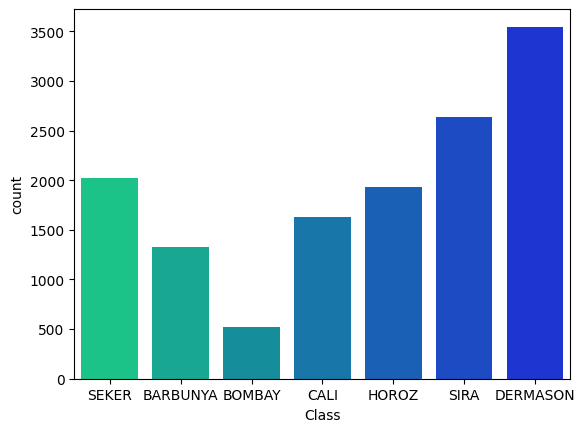

In [10]:
# Vẽ biểu đồ cột dựa trên số lượng mẫu dữ liệu của cột Class
sns.countplot(x='Class', data = dataset, palette= 'winter_r')


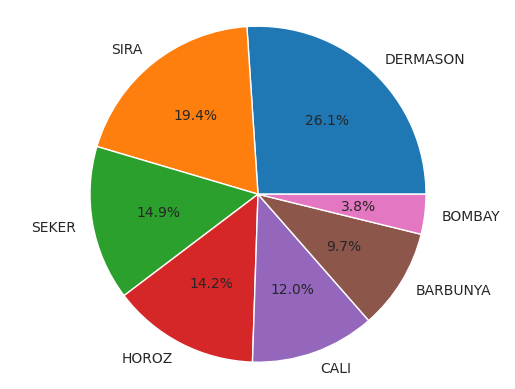

In [ ]:
# Vẽ biểu đồ tròn dựa trên số lượng mẫu dữ liệu của cột Class
dataset['Class'].value_counts().index
data = {'Loại đậu': dataset['Class'].value_counts().index,
        'Số lượng': dataset['Class'].value_counts().values}
df = pd.DataFrame(data)
total = df['Số lượng'].sum()

# Tính phần trăm cho từng loại đậu
df['Phần trăm'] = 100 * df['Số lượng'] / total

# Vẽ biểu đồ tròn
sns.set_style("whitegrid")
plt.pie(df['Phần trăm'], labels=df['Loại đậu'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

**Nhận xét:**


*   Có 7 lớp gồm: Seker, Barbunya, Bombay, Cali, Dermason, Horoz và Sira.
Số lượng dữ liệu thuộc lớp Bombay rất ít, nhưng dữ liệu lại nhiều dần, nghiêng về phía loại đậu Dermason, đậu Dermason có số lượng nhiều nhất.
=> Dữ liệu không cân bằng.



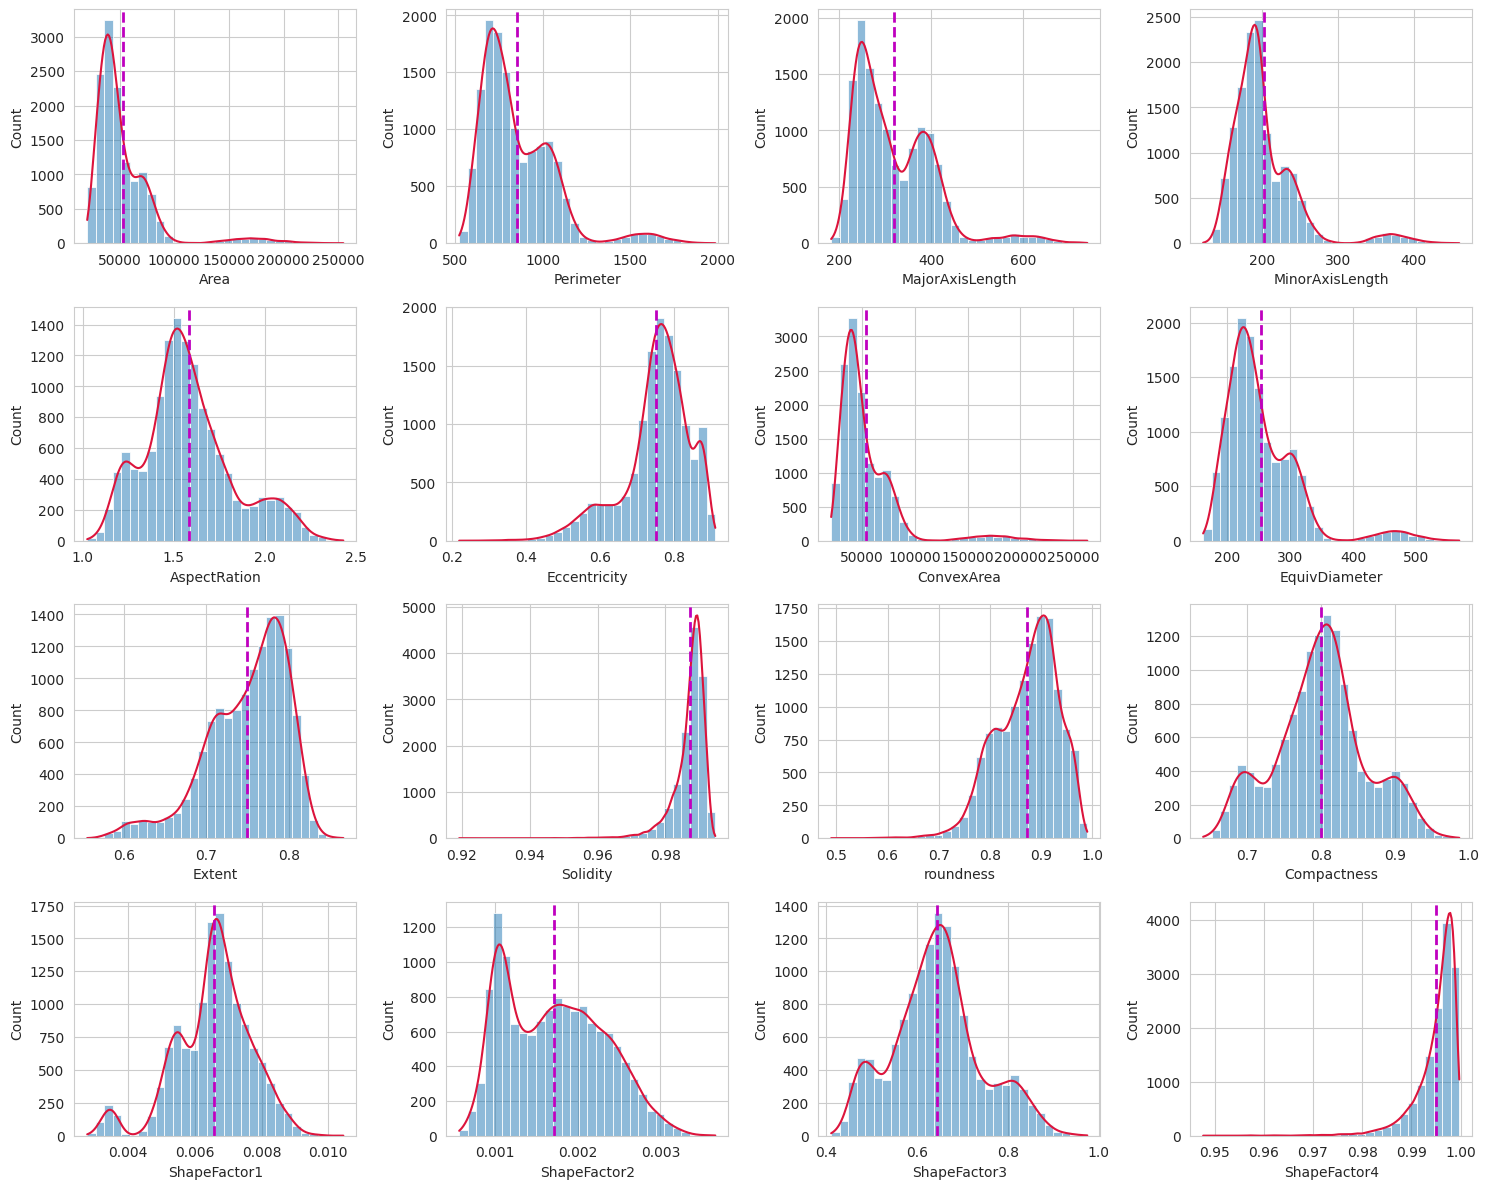

In [ ]:
# Lấy ra danh sách tên các đặc trưng định lượng
Numeric_cols = dataset.drop(columns=['Class']).columns
# Biểu đồ histogram của 16 đặc trưng định lượng
fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(dataset[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=dataset[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

**Nhận xét:**
Sự phân phối của dữ liệu có đuôi dài (long tails) và hầu hết các đặc trưng là hai chế độ (bi-modal). Có nghĩa là một vài lớp đậu khá khác biệt so với những lớp còn lại. Điều này giúp việc phân loại các loại đậu trở nên dễ dàng hơn.

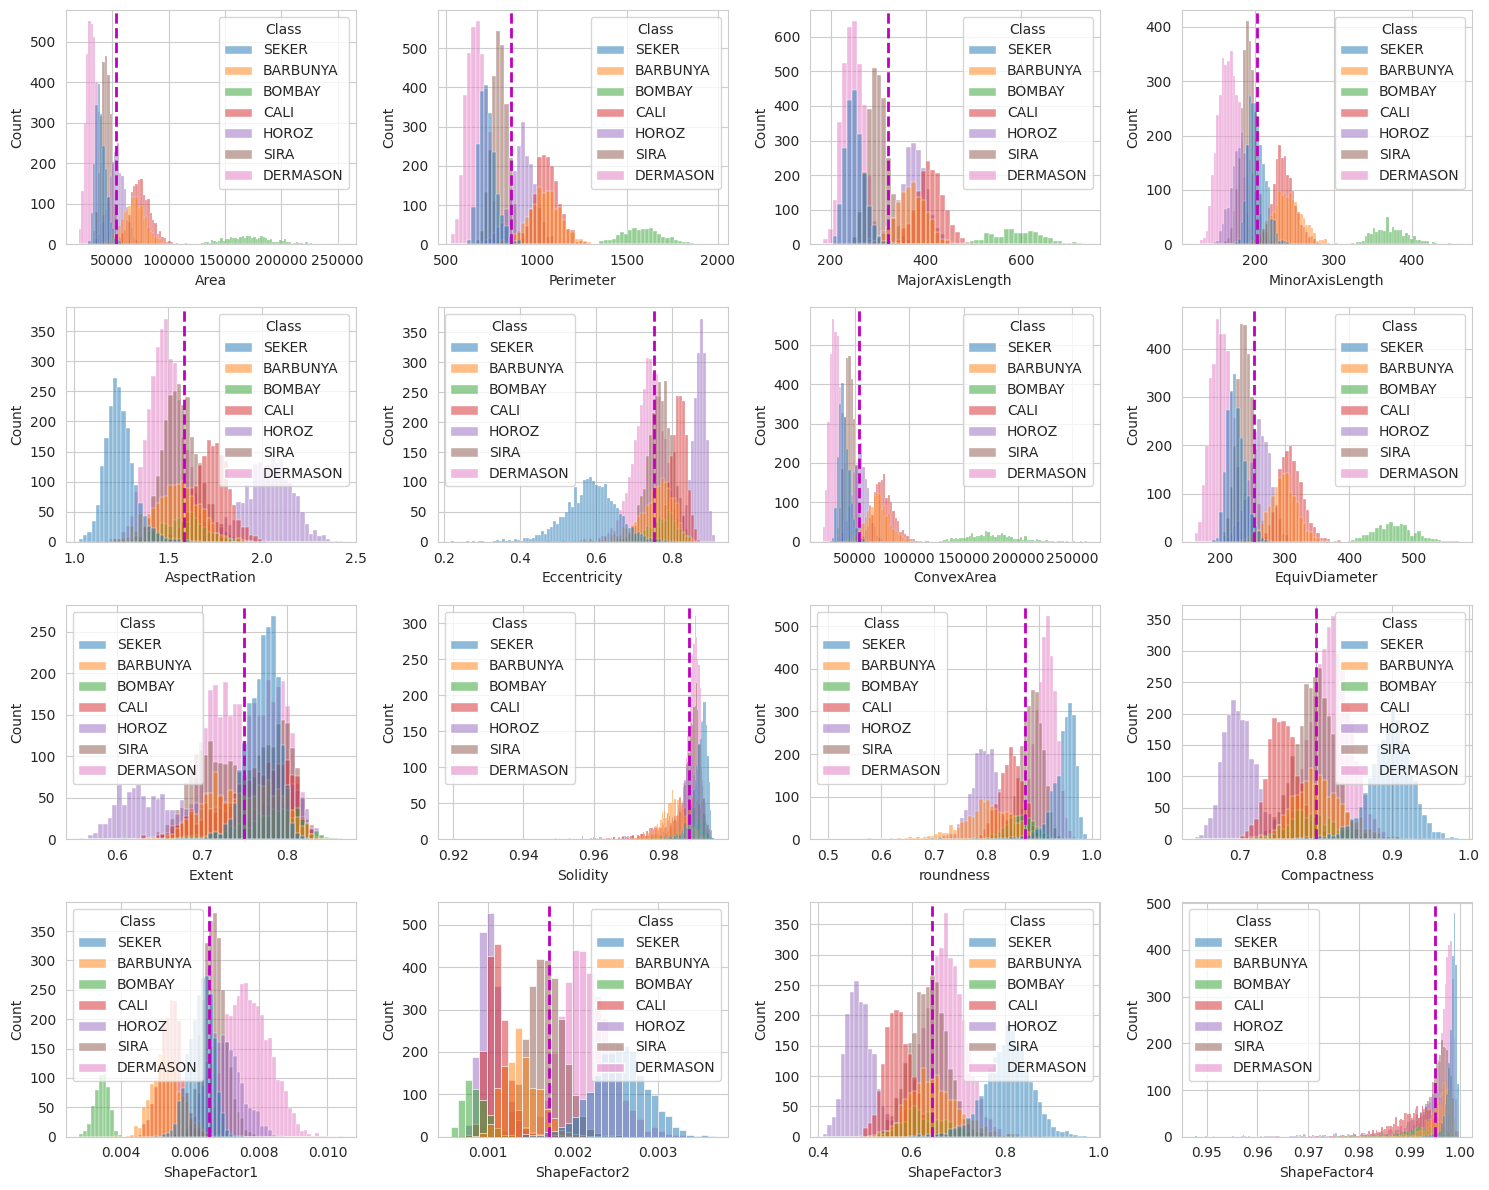

In [ ]:
Numeric_cols = dataset.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(data=dataset,x=variable, ax=subplot,hue='Class')
    g.axvline(x=dataset[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

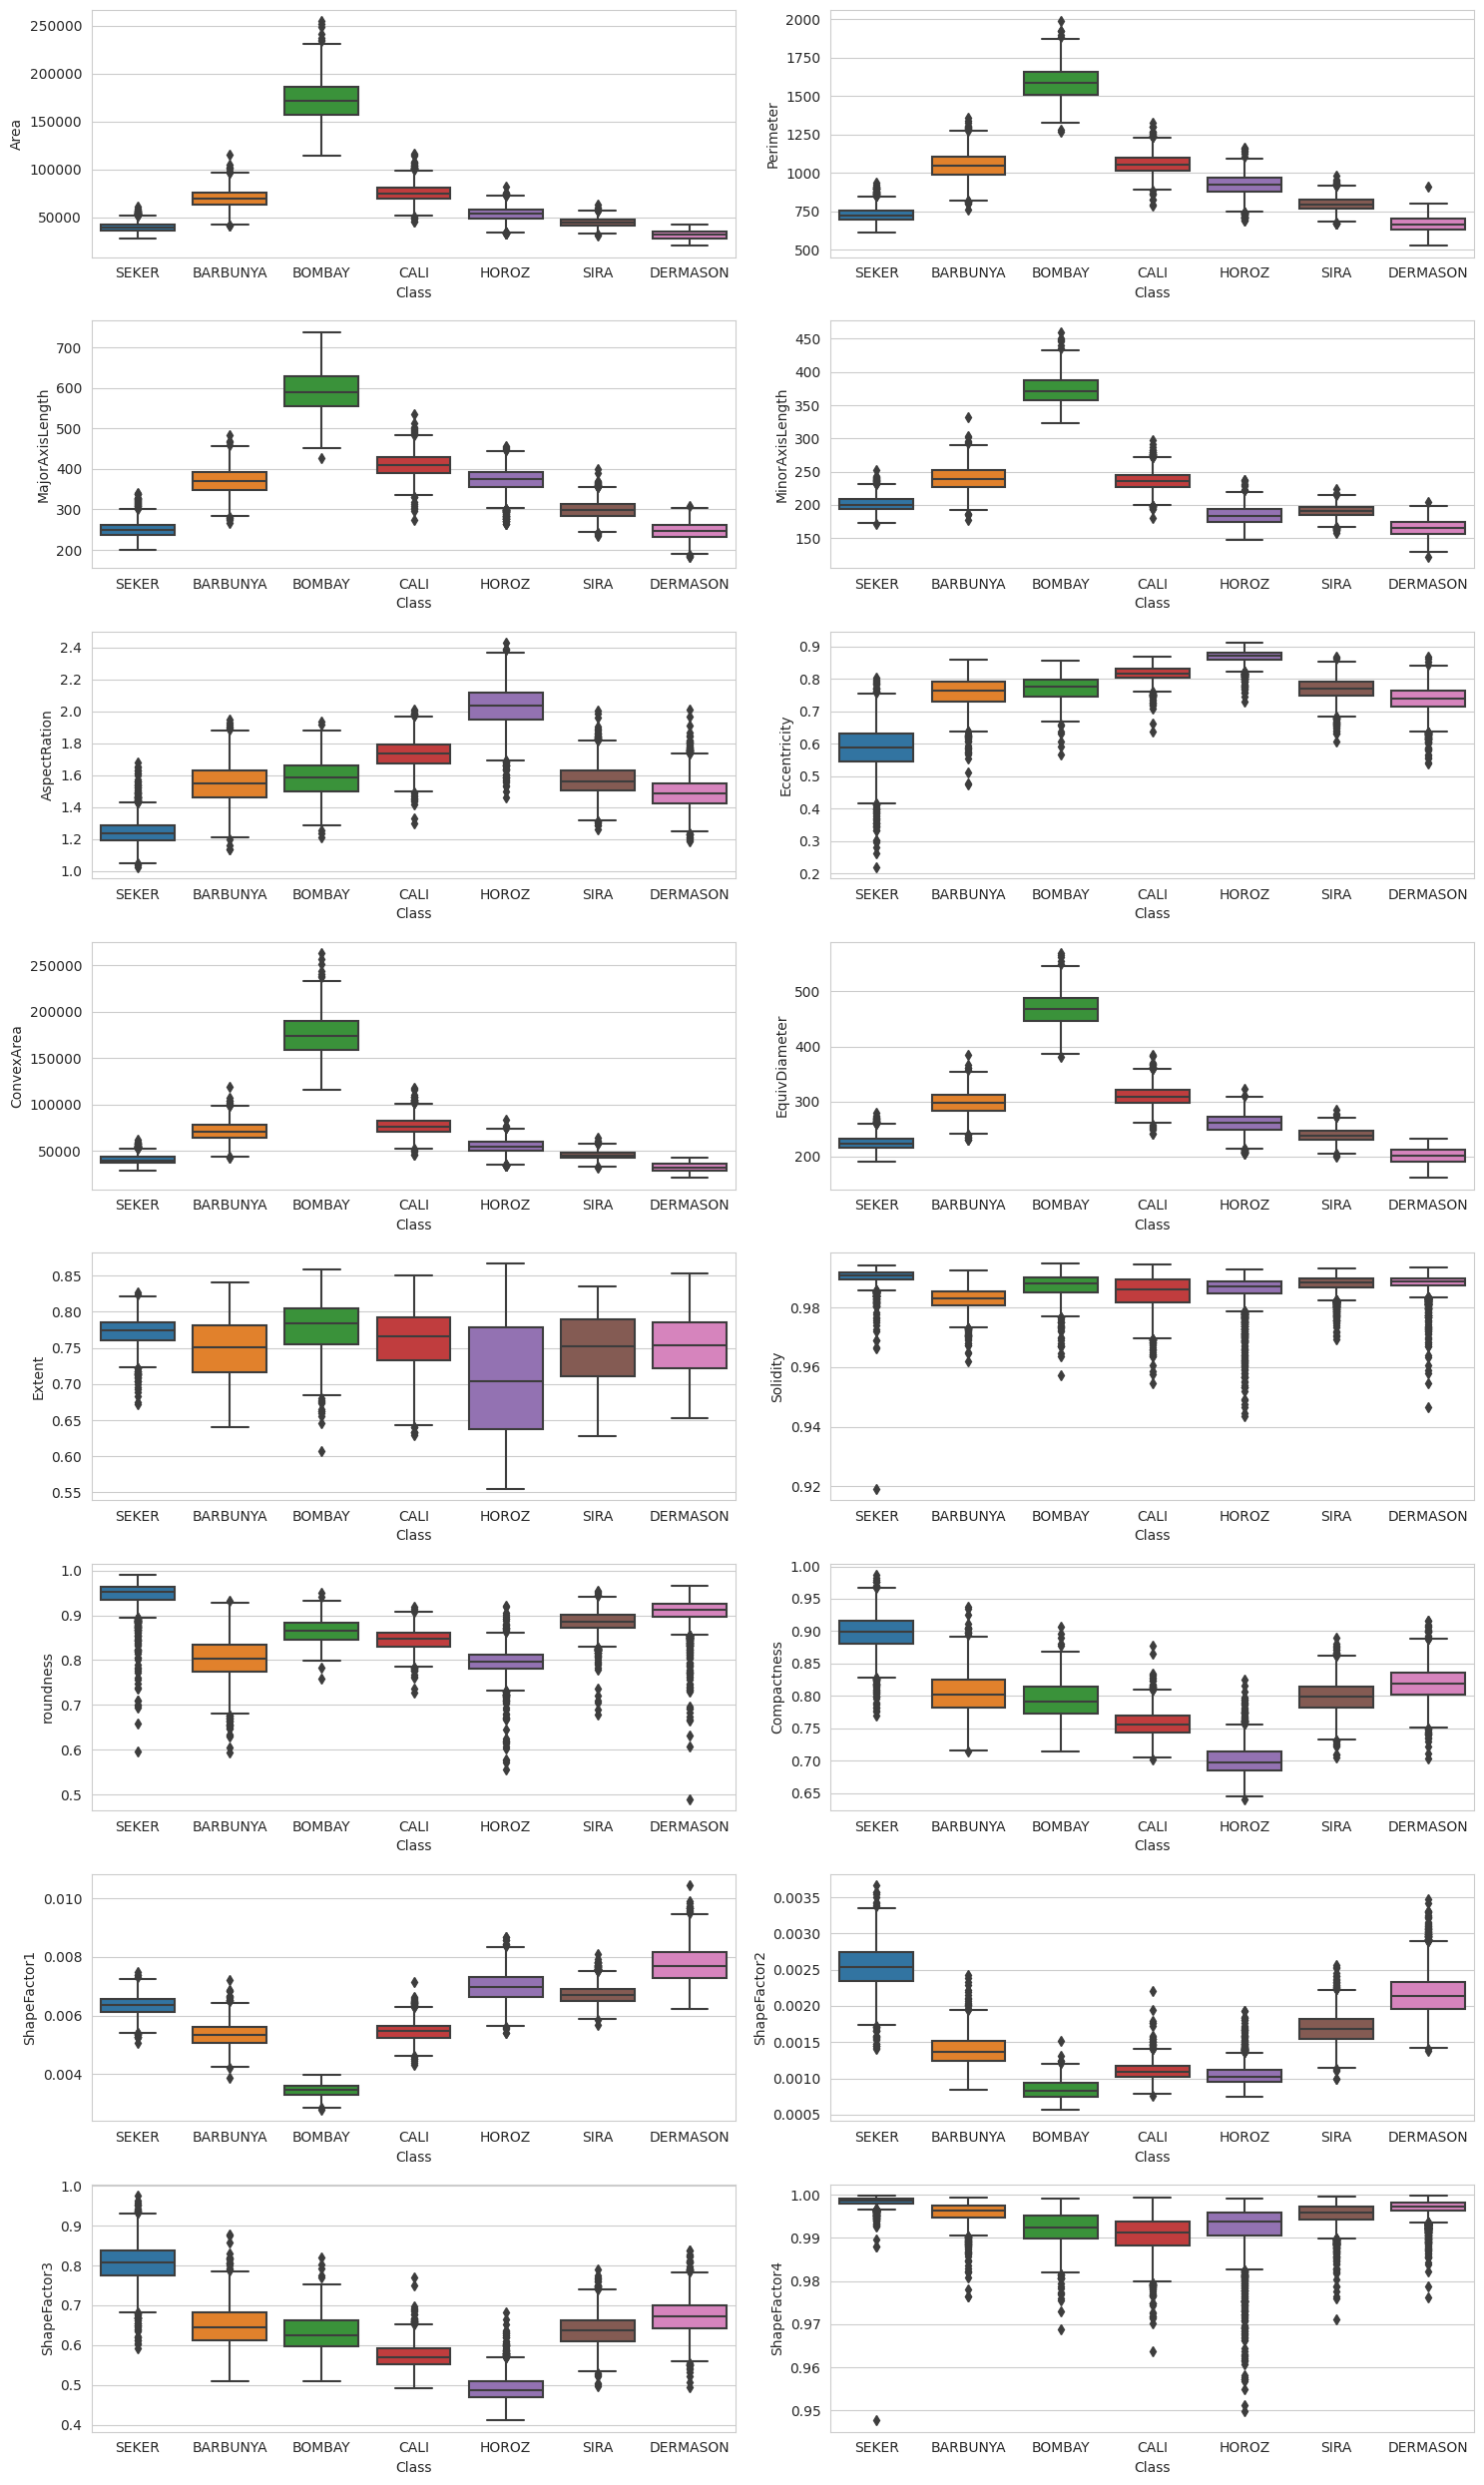

In [ ]:
# Biểu đồ hộp thể hiện quan hệ giữa đặc trưng định lượng và biến phân lớp
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=dataset['Class'], y= dataset[variable], ax=subplot)
plt.tight_layout()

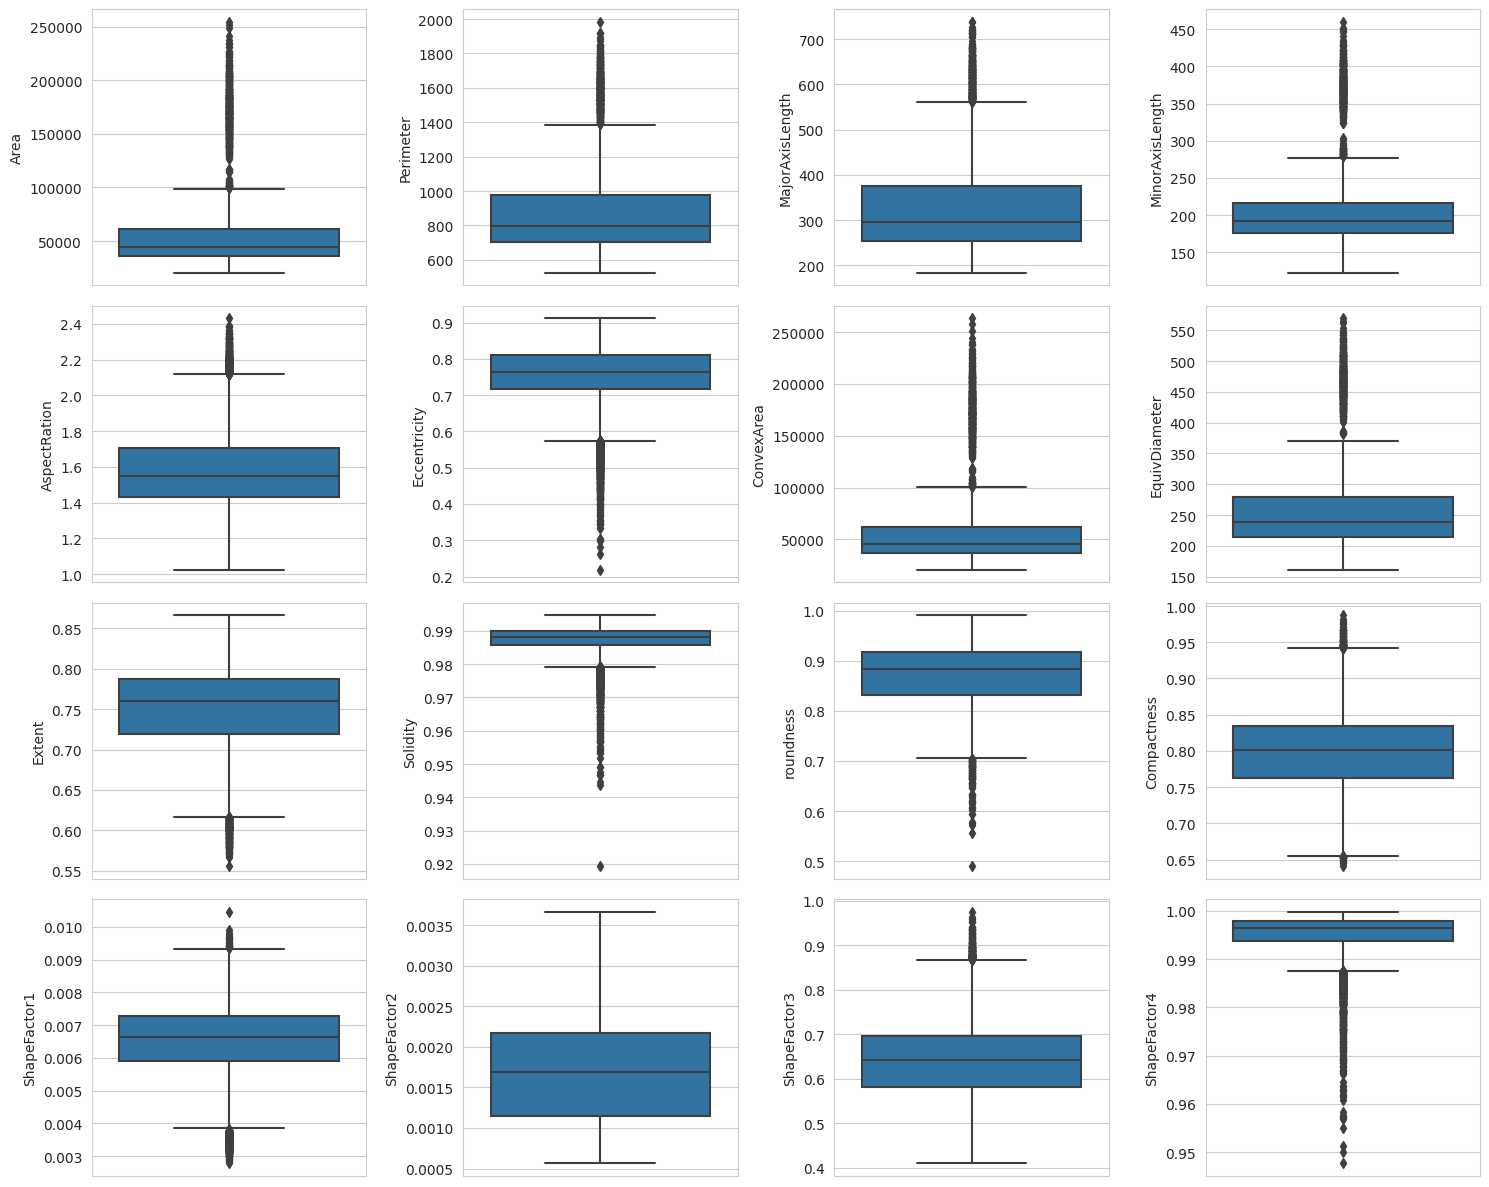

In [ ]:
# Biểu đồ hộp cua từng đặc trưng
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= dataset[variable], ax=subplot)
plt.tight_layout()

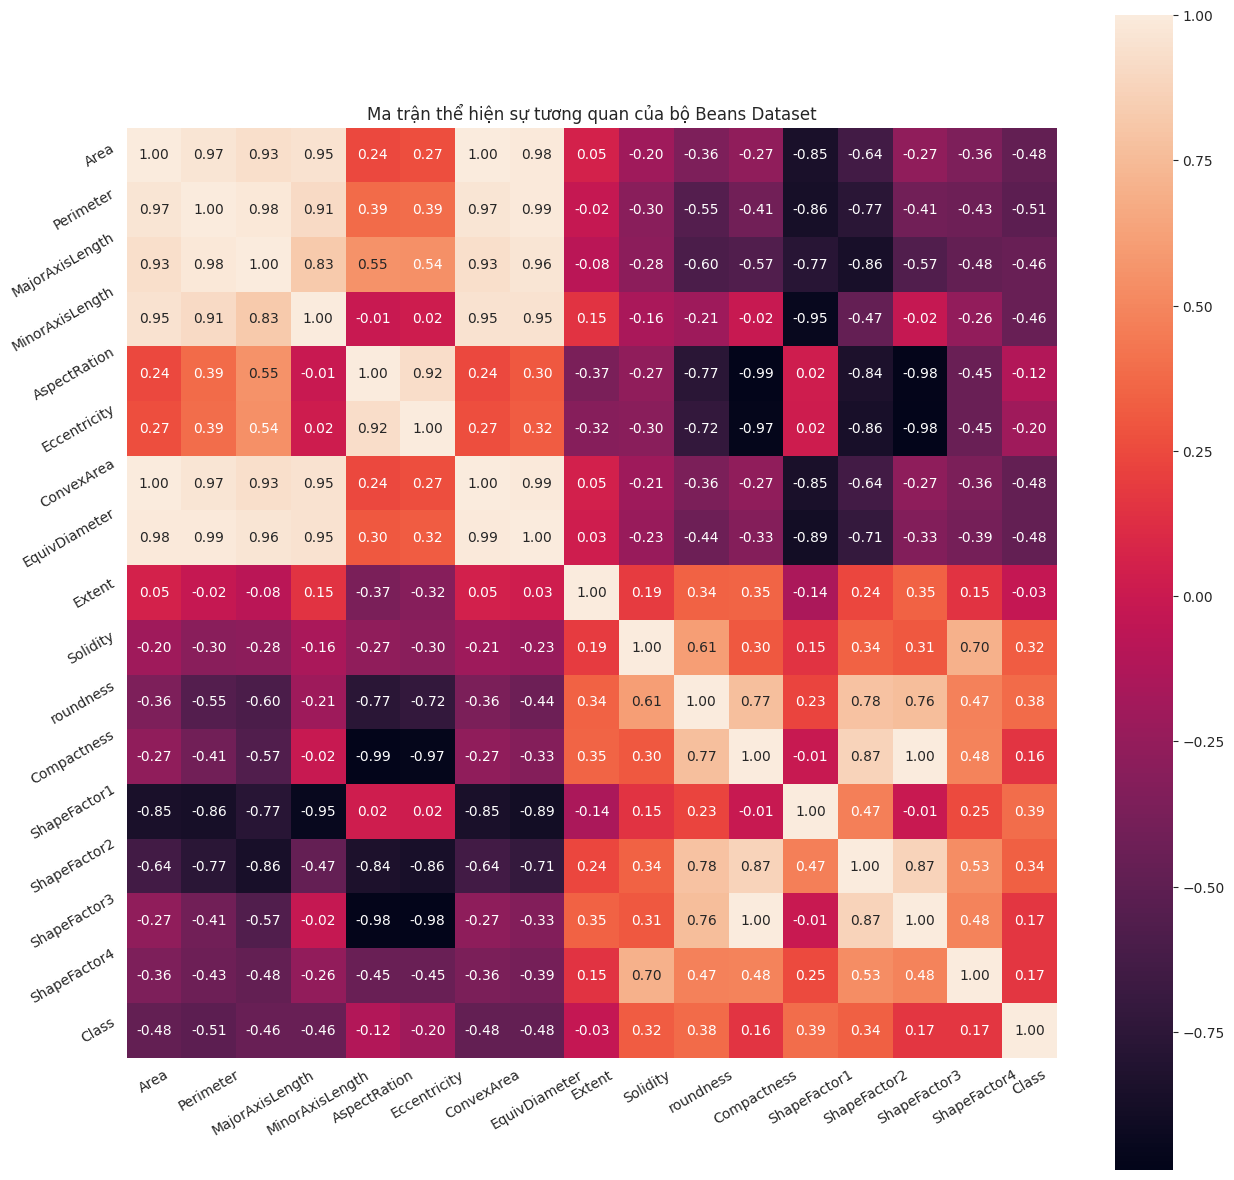

In [ ]:
# Ma trận thể hiện sự tương quan của các đặc trưng với nhau
corr_matrix = dataset.corr()

plt.figure(figsize=(15,15))
plt.title('Ma trận thể hiện sự tương quan của bộ Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

**Nhận xét**
1. Từ ma trận trên chúng ta có thể thấy có rất nhiều đặc trưng có độ tương quan
cao với nhau.
2. Vì vậy chúng ta tiến hành tìm kiếm và loại ra những đặc trưng có độ tương quan cao (>0.9), nhằm tránh tình trạng overfitting khi train model.

**Những đặc trưng có thể được loại bỏ:**


* ShapeFactor3
* Compactness
* AspectRation
* Area
* MajorAxisLength
* MinorAxisLength
* ConvexArea
* ShapeFactor1
* EquivDiameter

# **Sơ chế dữ liệu**

In [11]:
# xóa những hàng có dữ liệu bị trùng lặp
dataset.drop_duplicates(inplace=True) 

In [12]:
# Chuyển dữ liệu ở cột Class thành dạng số
le = preprocessing.LabelEncoder()
le.fit(dataset['Class'])
dataset['Class'] = le.transform(dataset['Class'])

# 'DERMASON':3,'SIRA':6,'SEKER':5,'HOROZ':4,'CALI':2,'BARBUNYA':0,'BOMBAY':1


In [13]:
# Kiểm tra biến phân lớp
dataset['Class'].value_counts()

3    3546
6    2636
5    2027
4    1860
2    1630
0    1322
1     522
Name: Class, dtype: int64

In [ ]:
# dataset ban đầu
original_dataset = dataset

original_dataset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [14]:
dataset = dataset.drop(['ShapeFactor3', 
                            'Compactness',
                            'AspectRation',
                            'Area',
                            'MajorAxisLength',
                            'MinorAxisLength',
                            'ConvexArea',
                            'EquivDiameter',
                            'ShapeFactor1'], axis = 1)
# dataset sau khi drop những đặc trưng có độ tương quan cao
dataset.head()

,Perimeter,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4,Class
0,610.291,0.549812,0.763923,0.988856,0.958027,0.003147,0.998724,5
1,638.018,0.411785,0.783968,0.984986,0.887034,0.003564,0.998430,5
2,624.110,0.562727,0.778113,0.989559,0.947849,0.003048,0.999066,5
3,645.884,0.498616,0.782681,0.976696,0.903936,0.003215,0.994199,5
4,620.134,0.333680,0.773098,0.990893,0.984877,0.003665,0.999166,5


In [15]:
# Chia dataset thành X và y tương ứng với data và target
X = dataset.drop(columns=['Class'])
y = dataset['Class']

X.head()

,Perimeter,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,610.291,0.549812,0.763923,0.988856,0.958027,0.003147,0.998724
1,638.018,0.411785,0.783968,0.984986,0.887034,0.003564,0.998430
2,624.110,0.562727,0.778113,0.989559,0.947849,0.003048,0.999066
3,645.884,0.498616,0.782681,0.976696,0.903936,0.003215,0.994199
4,620.134,0.333680,0.773098,0.990893,0.984877,0.003665,0.999166


In [16]:
# Chia bộ dữ liệu thành bộ train và bộ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
# Chuẩn hóa dữ liệu X_train và X_test
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# **SVM**

+-----------+----------------+-----------------+--------------+----------+
| Algorithm | accuracy_score | precision_score | recall_score | f1_score |
+-----------+----------------+-----------------+--------------+----------+
|    SVM    |      0.92      |      0.936      |    0.928     |  0.931   |
+-----------+----------------+-----------------+--------------+----------+


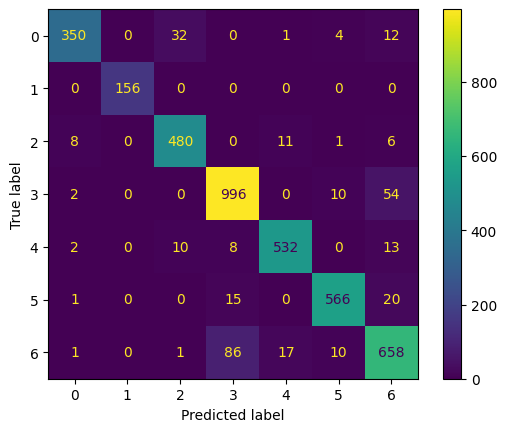

In [18]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

sy_pred = clf.predict(X_test)

acc = accuracy_score(y_test, sy_pred)
pre = precision_score(y_test, sy_pred, average='macro')
re = recall_score(y_test, sy_pred, average='macro')
f1_c = f1_score(y_test, sy_pred, average='macro')

# Hiển thị kết quả bằng Confusion Matrix

cm_display = ConfusionMatrixDisplay.from_predictions(y_test, sy_pred)


t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["SVM", round(acc, 3), round(pre, 3), round(re,3 ), round(f1_c, 3 )])
print(t)

# **SVM with GridSearchCV**

Best parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
+-----------------------+----------------+-----------------+--------------+----------+
|       Algorithm       | accuracy_score | precision_score | recall_score | f1_score |
+-----------------------+----------------+-----------------+--------------+----------+
| SVM with GridSearchCV |      0.92      |      0.936      |    0.928     |  0.931   |
+-----------------------+----------------+-----------------+--------------+----------+


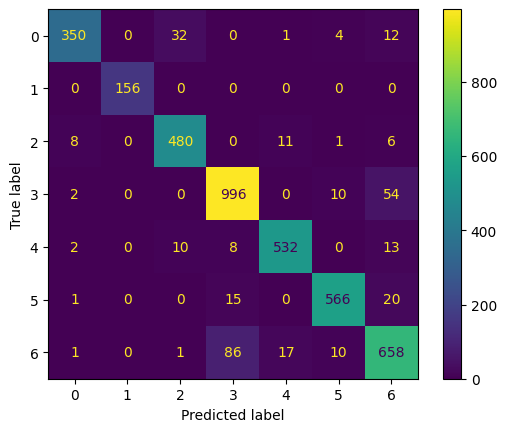

In [19]:
# Xây dựng mô hình SVM with GridSearchCV
svm = svm.SVC()
parameter_grid = {
    'C': [1, 10, 50], 
    'gamma': [0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

models = GridSearchCV(svm, parameter_grid, cv=5)
models.fit(X_train, y_train)
print('Best parameters: {}'.format(models.best_params_))

# Tìm kiếm hyperparameter tốt nhất
best_model = models.best_estimator_

# Huấn luyện mô hình với hyperparameter tốt nhất
best_model.fit(X_train, y_train)

sy_pred = best_model.predict(X_test)

acc2 = accuracy_score(y_test, sy_pred)
pre2 = precision_score(y_test, sy_pred, average='macro')
re2 = recall_score(y_test, sy_pred, average='macro')
f1_c2 = f1_score(y_test, sy_pred, average='macro')

# Hiển thị kết quả bằng Confusion Matrix
cm = confusion_matrix(y_test, sy_pred)
cm
ConfusionMatrixDisplay.from_predictions(y_test, sy_pred)

t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["SVM with GridSearchCV", round(acc2, 3), round(pre2, 3), round(re2,3 ), round(f1_c2, 3 )])
print(t)

# **KNN**

+-----------+----------------+-----------------+--------------+----------+
| Algorithm | accuracy_score | precision_score | recall_score | f1_score |
+-----------+----------------+-----------------+--------------+----------+
|    KNN    |     0.903      |       0.92      |    0.915     |  0.917   |
+-----------+----------------+-----------------+--------------+----------+


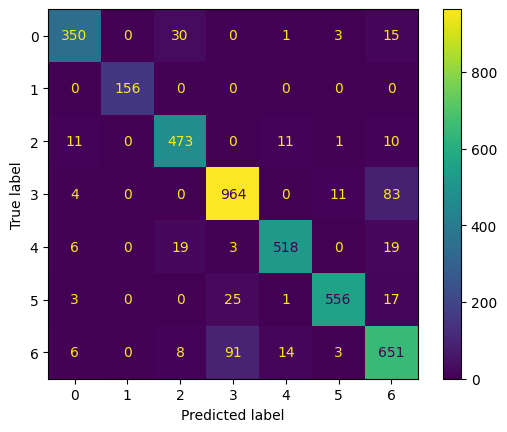

In [20]:
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)

ky_pred = kNN.predict(X_test)

kacc = accuracy_score(y_test, ky_pred)
kpre = precision_score(y_test, ky_pred, average='macro')
kre = recall_score(y_test, ky_pred, average='macro')
kkf1_c = f1_score(y_test, ky_pred,average='macro')

# Hiển thị kết quả bằng Confusion Matrix
cm = confusion_matrix(y_test, ky_pred)
cm
ConfusionMatrixDisplay.from_predictions(y_test, ky_pred)

t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["KNN", round(kacc, 3), round(kpre, 3), round(kre,3 ), round(kkf1_c, 3 )])
print(t)


# **KNN With GridSearchCV**

Best parameters:  {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 7}
Best score:  0.9127637130801688
+-----------------------+----------------+-----------------+--------------+----------+
|       Algorithm       | accuracy_score | precision_score | recall_score | f1_score |
+-----------------------+----------------+-----------------+--------------+----------+
| KNN With GridSearchCV |     0.907      |      0.924      |    0.917     |   0.92   |
+-----------------------+----------------+-----------------+--------------+----------+


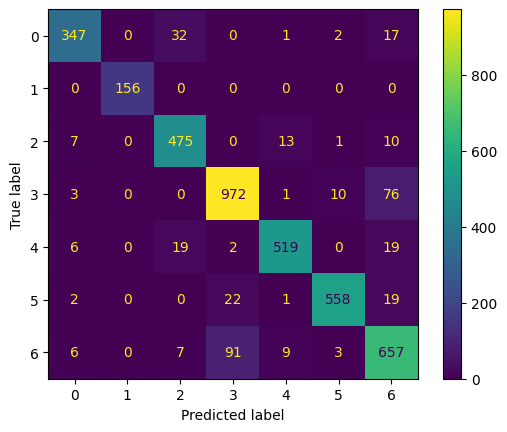

In [21]:
parameter_grid =  {
    'n_neighbors':[4,5,6,7,10,15],
    'leaf_size':[5, 10, 15, 20, 50, 100],
    'n_jobs':[-1],
    'algorithm':['auto']
}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, parameter_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Đánh giá mô hình
ky_pred = grid_search.predict(X_test)

kacc_gcv = accuracy_score(y_test, ky_pred)
kpre_gcv = precision_score(y_test, ky_pred, average='macro')
kre_gcv = recall_score(y_test, ky_pred, average='macro')
kkf1_c_gcv = f1_score(y_test, ky_pred,average='macro')

# Hiển thị kết quả bằng Confusion Matrix
cm = confusion_matrix(y_test, ky_pred)
cm
ConfusionMatrixDisplay.from_predictions(y_test, ky_pred)

t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["KNN With GridSearchCV", round(kacc_gcv, 3), round(kpre_gcv, 3), round(kre_gcv,3 ), round(kkf1_c_gcv, 3 )])
print(t)

# **RandomForest Classifier**

+--------------+----------------+-----------------+--------------+----------+
|  Algorithm   | accuracy_score | precision_score | recall_score | f1_score |
+--------------+----------------+-----------------+--------------+----------+
| RandomForest |     0.918      |      0.919      |    0.918     |  0.918   |
+--------------+----------------+-----------------+--------------+----------+


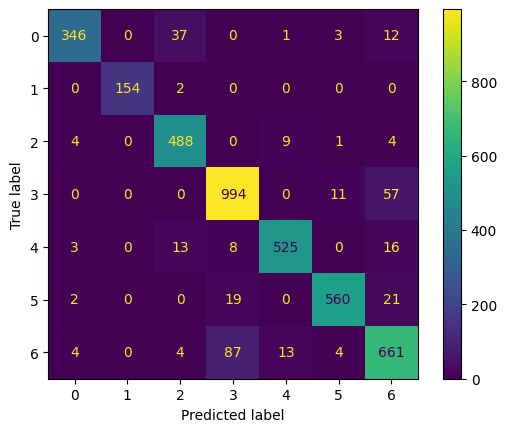

In [22]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10)
# Huấn luyện model trên tập huấn luyện
clf.fit(X_train, y_train)

# Dự đoán đầu ra cho bộ test
y_pred = clf.predict(X_test)
# Đánh giá độ chính xác của mô hình trên bộ test
racc = accuracy_score(y_test, y_pred)
rpre = precision_score(y_test, y_pred, average='weighted')
rre = recall_score(y_test, y_pred, average='weighted')
rf1_c = f1_score(y_test, y_pred,average='weighted')

# Hiển thị kết quả bằng Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["RandomForest", round(racc, 3), round(rpre, 3), round(rre,3 ), round(rf1_c, 3 )])
print(t)

# **Random Forest with GridSearchCV**



Best parameters:  {'max_depth': 15, 'n_estimators': 100}
+---------------------------------+----------------+-----------------+--------------+----------+
|            Algorithm            | accuracy_score | precision_score | recall_score | f1_score |
+---------------------------------+----------------+-----------------+--------------+----------+
| Random Forest with GridSearchCV |     0.923      |      0.924      |    0.923     |  0.924   |
+---------------------------------+----------------+-----------------+--------------+----------+


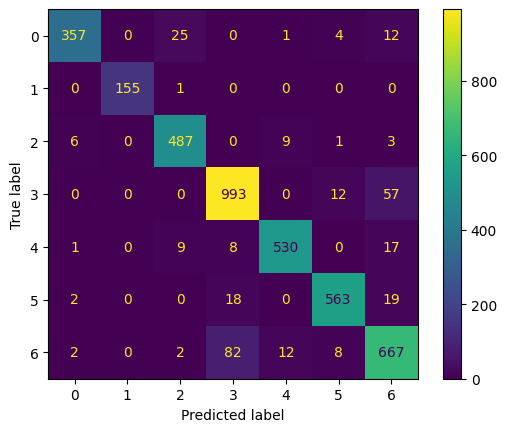

In [23]:
# Tạo model Random Forest with GridSearchCV
clf = RandomForestClassifier()
# Tìm kiếm siêu tham số tốt nhất bằng GridSearchCV
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# In ra siêu tham số tốt nhất và độ chính xác của model trên tập kiểm tra
print("Best parameters: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)

# Đánh giá độ chính xác của mô hình trên bộ test
racc2 = accuracy_score(y_test, y_pred)
rpre2 = precision_score(y_test, y_pred, average='weighted')
rre2 = recall_score(y_test, y_pred, average='weighted')
rf1_c2 = f1_score(y_test, y_pred,average='weighted')

# Hiển thị kết quả bằng Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["Random Forest with GridSearchCV", round(racc2, 3), round(rpre2, 3), round(rre2,3 ), round(rf1_c2, 3 )])
print(t)

# **GaussianNB**

+------------+----------------+-----------------+--------------+----------+
| Algorithm  | accuracy_score | precision_score | recall_score | f1_score |
+------------+----------------+-----------------+--------------+----------+
| GaussianNB |     0.881      |      0.882      |    0.881     |  0.881   |
+------------+----------------+-----------------+--------------+----------+


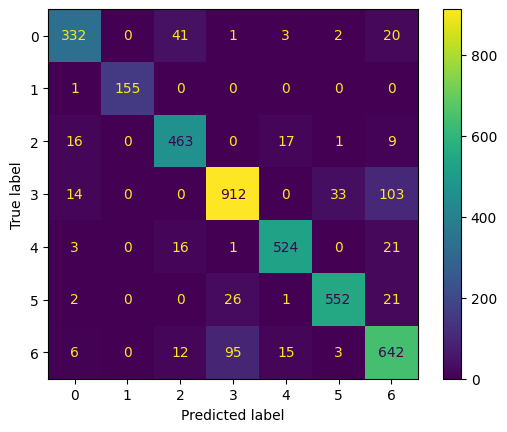

In [24]:
# Xây dựng mô hình Naive Bayes
model = GaussianNB()

# Huấn luyện mô hình trên bộ train
model.fit(X_train, y_train)

# Dự đoán đầu ra cho bộ test
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình trên bộ test
bacc = accuracy_score(y_test, y_pred)
bpre = precision_score(y_test, y_pred, average='weighted')
bre = recall_score(y_test, y_pred, average='weighted')
bf1_c = f1_score(y_test, y_pred,average='weighted')

# Hiển thị kết quả bằng Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["GaussianNB", round(bacc, 3), round(bpre, 3), round(bre,3 ), round(bf1_c, 3 )])
print(t)

# **GaussianNB with GridSearchCV**

Best parameters:  {'var_smoothing': 1e-09}
Best score:  0.8849156118143459
+------------------------------+----------------+-----------------+--------------+----------+
|          Algorithm           | accuracy_score | precision_score | recall_score | f1_score |
+------------------------------+----------------+-----------------+--------------+----------+
| GaussianNB with GridSearchCV |     0.881      |      0.899      |    0.896     |  0.898   |
+------------------------------+----------------+-----------------+--------------+----------+


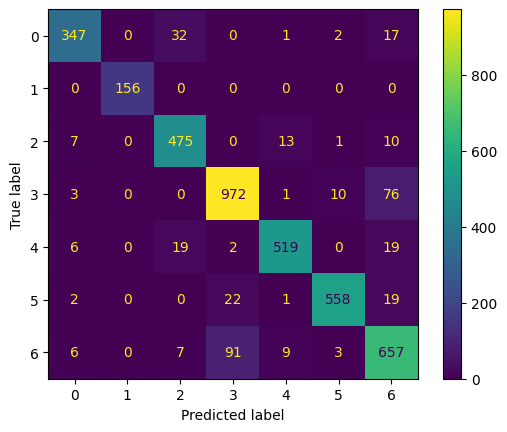

In [31]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

gnb = GaussianNB()

grid_search = GridSearchCV(gnb, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

y_pred = grid_search.predict(X_test)

bacc_gcv = accuracy_score(y_test, y_pred)
bpre_gcv = precision_score(y_test, y_pred, average='macro')
bre_gcv = recall_score(y_test, y_pred, average='macro')
bkf1_c_gcv = f1_score(y_test, y_pred,average='macro')

# Hiển thị kết quả bằng Confusion Matrix
cm = confusion_matrix(y_test, ky_pred)
cm
ConfusionMatrixDisplay.from_predictions(y_test, ky_pred)

t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["GaussianNB with GridSearchCV", round(bacc_gcv, 3), round(bpre_gcv, 3), round(bre_gcv,3 ), round(bkf1_c_gcv, 3 )])
print(t)

# **Fully Connected Neural Network with output = 7**

Epoch 1/50
267/267 [==============================] - 2s 4ms/step - loss: 0.8757 - accuracy: 0.7187 - val_loss: 0.3527 - val_accuracy: 0.8977
Epoch 2/50
267/267 [==============================] - 1s 3ms/step - loss: 0.2890 - accuracy: 0.9068 - val_loss: 0.2541 - val_accuracy: 0.9167
Epoch 3/50
267/267 [==============================] - 1s 3ms/step - loss: 0.2293 - accuracy: 0.9205 - val_loss: 0.2338 - val_accuracy: 0.9177
Epoch 4/50
267/267 [==============================] - 1s 2ms/step - loss: 0.2127 - accuracy: 0.9243 - val_loss: 0.2352 - val_accuracy: 0.9103
Epoch 5/50
267/267 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9238 - val_loss: 0.2168 - val_accuracy: 0.9156
Epoch 6/50
267/267 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9291 - val_loss: 0.2314 - val_accuracy: 0.9135
Epoch 7/50
267/267 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9283 - val_loss: 0.2166 - val_accuracy: 0.9167
Epoch 

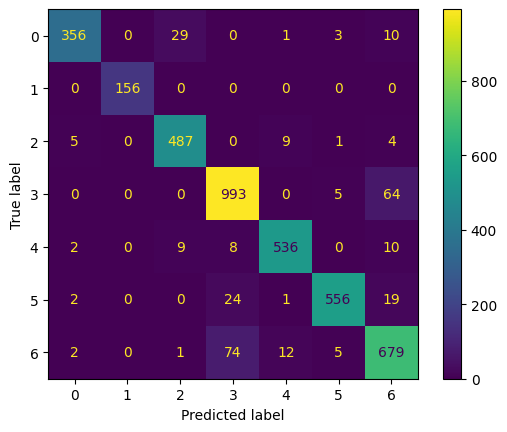

In [32]:
# Xây dựng mô hình Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Chuyển tập y sang kiểu category
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, validation_split=0.1)

# Đánh giá mô hình trên tập kiểm tra

test_loss, test_acc = model.evaluate(X_test, y_test_onehot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

y_pred = model.predict(X_test)

# Tính toán các thông số đánh giá
nnprecision = precision_score(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
nnrecall = recall_score(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
nnf1 = f1_score(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Hiển thị kết quả bằng Confusion Matrix
cm = confusion_matrix(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1))
cm
ConfusionMatrixDisplay.from_predictions(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1))

t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["Neural Network", round(test_acc, 3), round(nnprecision, 3), round(nnrecall,3 ), round(nnf1, 3 )])
print(t)

# **Neural network sử dụng với GridSearchCV**

Epoch 1/15


<ipython-input-33-bfa926804b95>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Streaming output truncated to the last 5000 lines.
198/198 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9389
Epoch 41/60
198/198 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9392
Epoch 42/60
198/198 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9389
Epoch 43/60
198/198 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9399
Epoch 44/60
198/198 [==============================] - 1s 3ms/step - loss: 0.1635 - accuracy: 0.9411
Epoch 45/60
198/198 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9402
Epoch 46/60
198/198 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9413
Epoch 47/60
198/198 [==============================] - 1s 3ms/step - loss: 0.1606 - accuracy: 0.9380
Epoch 48/60
198/198 [==============================] - 1s 3ms/step - loss: 0.1629 - accuracy: 0.9397
Epoch 49/60
198/198 [==============================]

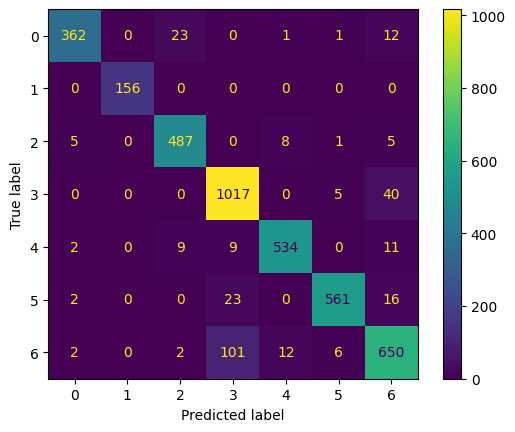

In [33]:
# Xây dựng mô hình neural network
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model)

optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32, 64, 128]
epochs = [15, 30, 60]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}

# Sử dụng GridSearchCV để tìm kiếm các siêu tham số tốt nhất cho mô hình
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Chuyển tập y sang kiểu category
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

grid_result = grid.fit(X_train, y_train_onehot)

# kết quả của GridSearchCV
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

# Huấn luyện mô hình trên bộ train với các hyperparameter tốt nhất
best_params = grid_result.best_params_
model = create_model(optimizer=best_params['optimizer'])
model.fit(X_train, y_train_onehot, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_test, y_test_onehot))

# Đánh giá mô hình trên tập kiểm tra
y_test_onehot = to_categorical(y_test)
test_loss, test_acc_gcv = model.evaluate(X_test, y_test_onehot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc_gcv)

y_pred = model.predict(X_test)

# Tính toán các thông số đánh giá
nnprecision_gcv = precision_score(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
nnrecall_gcv = recall_score(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
nnf1_gcv= f1_score(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Hiển thị kết quả bằng Confusion Matrix
cm = confusion_matrix(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1))
cm
ConfusionMatrixDisplay.from_predictions(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1))

t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["Neural Network with GridSearchCV", round(test_acc_gcv, 3), round(nnprecision_gcv, 3), round(nnrecall_gcv,3 ), round(nnf1_gcv, 3 )])
print(t)

In [34]:
# Bảng so sánh các model đã train
t = PrettyTable()
t.field_names = ["Algorithm","accuracy_score", "precision_score", "recall_score", "f1_score"]
t.add_row(["SVM", round(acc, 6), round(pre, 6), round(re,6), round(f1_c, 6)])
t.add_row(["SVM with GridSearchCV", round(acc2, 6), round(pre2, 6), round(re2, 6), round(f1_c2, 6)])
t.add_row(["KNN", round(kacc, 6), round(kpre, 6), round(kre,6), round(kkf1_c, 6)])
t.add_row(["KNN with GridSearchCV", round(kacc_gcv, 6), round(kpre_gcv, 6), round(kre_gcv,6), round(kkf1_c_gcv, 6)])
t.add_row(["Random Forest", round(racc, 6), round(rpre, 6), round(rre,6), round(rf1_c, 6)])
t.add_row(["RandomForest with GridSearchCV",round(racc2, 6), round(rpre2, 6), round(rre2,6), round(rf1_c2,6)])
t.add_row(["GaussianNB", round(bacc, 6), round(bpre, 6), round(bre,6), round(bf1_c, 6 )])
t.add_row(["GaussianNB with GridSearchCV", round(bacc_gcv, 6), round(bpre_gcv, 6), round(bre_gcv,6), round(bkf1_c_gcv, 6 )])
t.add_row(["Neural NetWork", round(test_acc, 6),round(nnprecision, 6),round(nnrecall, 6),round(nnf1, 6)])
t.add_row(["Neural NetWork with GridSearchCV", round(test_acc_gcv, 6),round(nnprecision_gcv, 6),round(nnrecall_gcv, 6),round(nnf1_gcv, 6)])
print(t)

+----------------------------------+----------------+-----------------+--------------+----------+
|            Algorithm             | accuracy_score | precision_score | recall_score | f1_score |
+----------------------------------+----------------+-----------------+--------------+----------+
|               SVM                |    0.92001     |     0.935581    |   0.928098   | 0.931457 |
|      SVM with GridSearchCV       |    0.92001     |     0.935581    |   0.928098   | 0.931457 |
|               KNN                |    0.902781    |     0.920228    |   0.91461    | 0.917117 |
|      KNN with GridSearchCV       |    0.906719    |     0.924311    |   0.917013   | 0.920231 |
|          Random Forest           |    0.917549    |     0.918888    |   0.917549   | 0.917623 |
|  RandomForest with GridSearchCV  |    0.923456    |     0.924276    |   0.923456   | 0.923564 |
|            GaussianNB            |    0.881122    |     0.882471    |   0.881122   | 0.881473 |
|   GaussianNB with 

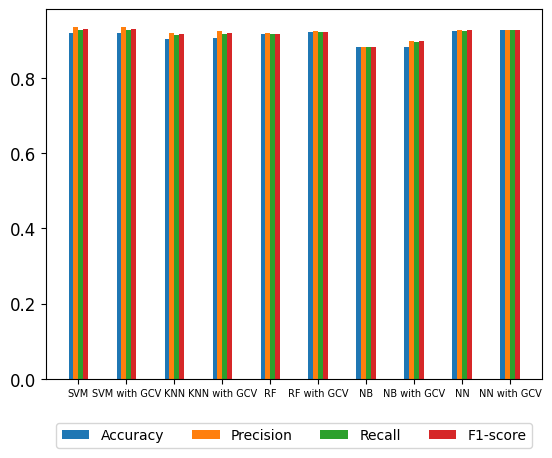

In [38]:
# Vẽ biểu đồ cột so sánh các mô hình
labels = ['SVM', 'SVM with GCV','KNN', 'KNN with GCV', 'RF', 'RF with GCV', 'NB', 'NB with GCV', 'NN','NN with GCV' ]
accuracy_list = [acc,acc2, kacc,kacc_gcv,racc, racc2, bacc, bacc_gcv,test_acc, test_acc_gcv ]
precision_list = [pre,pre2, kpre, kpre_gcv, rpre, rpre2, bpre, bpre_gcv,nnprecision, nnprecision_gcv]
recall_list = [re, re2, kre,kre_gcv,rre, rre2, bre, bre_gcv, nnrecall, nnrecall_gcv]
f1_score_list = [f1_c, f1_c2, kkf1_c,kkf1_c_gcv, rf1_c, rf1_c2, bf1_c, bkf1_c_gcv, nnf1,nnf1_gcv]

x = np.arange(len(labels))
width = 0.1
bar_width = 0.3
bar_padding = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, accuracy_list, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision_list, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall_list, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_score_list, width, label='F1-score')

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=7)
ax.tick_params(axis='y', labelsize=12)
ax.legend(fontsize=12)

legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=10)

plt.show()

# **Tổng kết**


1. Các mô hình SVM và Neural Network có Accuracy, Precision, Recall và F1 score cao nhất trong số tất cả các mô hình.
2. Sự khác biệt trong hiệu suất giữa các mô hình SVM và Neural Network là không đáng kể, với mô hình Neural Network có điểm số thấp hơn một chút.
3. Mô hình KNN, Random Forest và GaussianNB có các chỉ số hiệu suất thấp hơn so với các mô hình SVM và Neural Network, nhưng vẫn hoạt động tốt.
4. GridSearchCV có tác động tích cực đến hiệu suất của mô hình. Đối với hầu hết các mô hình, các chỉ số hiệu suất cải thiện sau khi sử dụng GridSearchCV để điều chỉnh hyperparameter.
5. Nhìn chung, các mô hình SVM và Neural Network có vẻ là các mô hình hoạt động tốt nhất trong trường hợp này, tiếp theo là Random Forest, KNN và GaussianNB. 
6. SVM lại có thời gian train nhanh hơn rất nhiều so với Neural Network, nên lựa chọn SVM trở thành lựa chọn tối ưu nhất. 
* => Vậy nên model tốt nhất ở đây là SVM với kernel: 'linear', C: 50, gamma: 0.001. Tuy nhiên, việc lựa chọn mô hình tốt nhất cuối cùng còn phụ thuộc vào các yêu cầu cụ thể của vấn đề, bao gồm các yếu tố như tính diễn giải, hiệu suất tính toán và khả năng mở rộng.

